This cell for import and preparing library

In [1]:
import itertools

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

import pandas as pd
import scipy.optimize as opt
from sklearn import metrics
from sklearn import preprocessing
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
% matplotlib inline


C:\Users\DuongPTHSE62871\venv\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


Get Data and push into dataframe

In [3]:
link_train = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
link_test = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'
headers = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
           'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'possible']

train_dataframe = pd.read_csv(link_train, header=None, names=headers)
test_dataframe = pd.read_csv(link_test, header=None, names=headers)

test_dataframe.drop([0, 0], inplace=True)
test_dataframe = test_dataframe.reset_index()

labels = ['education', 'workclass', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']
for label in labels:
    train_dataframe[label] = train_dataframe[label].astype('str')
    test_dataframe[label] = test_dataframe[label].astype('str')

train_dataframe['sex'] = preprocessing.LabelEncoder().fit([' Male', ' Female']).transform(train_dataframe['sex'])
test_dataframe['sex'] = preprocessing.LabelEncoder().fit([' Male', ' Female']).transform(test_dataframe['sex'])
train_dataframe['possible'] = preprocessing.LabelEncoder().fit([' <=50K', ' >50K']).transform(
    train_dataframe['possible'])
test_dataframe['possible'] = preprocessing.LabelEncoder().fit([' <=50K.', ' >50K.']).transform(
    test_dataframe['possible'])


In [0]:
def oneHotEncoding(label):
    Feature = train_dataframe[[label]]  #Other columns to be included
    Feature = pd.concat([train_dataframe[[label]], pd.get_dummies(train_dataframe[label])],
                        axis=1)  #One-hot encoding all categorical data in [label] column
    Feature.drop([label], axis=1, inplace=True)  #Remove column named label
    return Feature

train_data = train_dataframe
test_data = test_dataframe

for label in labels:
    train_data = pd.concat([train_data, oneHotEncoding(label)], axis=1)
    test_data = pd.concat([test_data, oneHotEncoding(label)], axis=1)
    train_data.drop(label, axis=1, inplace=True)
    test_data.drop(label, axis=1, inplace=True)

train_data.drop([' ?'], axis=1, inplace=True)
test_data.drop([' ?'], axis=1, inplace=True)
train_data = train_data.fillna(0)
test_data = test_data.fillna(0)


In [0]:
columns_for_datas = train_data.columns.values.tolist()
columns_for_datas


##KNN

In [0]:
y_train = train_data['possible']
X_train = train_data[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]
y_test = test_data['possible']
X_test = test_data[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]


In [0]:
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))


In [7]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
neigh


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [0]:
yhat = neigh.predict(X_test)


In [10]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy : ", metrics.accuracy_score(y_test, yhat))


Train set Accuracy:  0.8602929885445779
Test set Accuracy :  0.8831424096311539


##Decision Tree

In [0]:
y_train = train_data['possible']
X_train = train_data[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]
y_test = test_data['possible']
X_test = test_data[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]


In [14]:
incomeTree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
incomeTree  # it shows the default parameters


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
incomeTree.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
predTree = incomeTree.predict(X_test)


In [ ]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))


##Logistic Regression

In [22]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LR


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
yhat = LR.predict(X_test)


In [0]:
yhat_prob = LR.predict_proba(X_test)


###Confusion Matrix

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 3846     0]
 [12435 16280]]
             precision    recall  f1-score   support

        0.0       1.00      0.57      0.72     28715
        1.0       0.24      1.00      0.38      3846

avg / total       0.91      0.62      0.68     32561



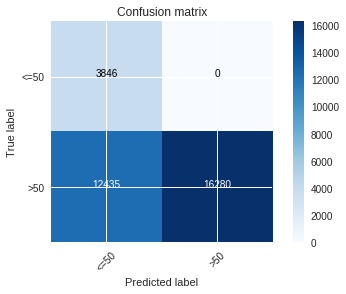

In [34]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['<=50','>50'],normalize= False,  title='Confusion matrix')

print (classification_report(y_test, yhat))

###Log loss

In [32]:
log_loss(y_test, yhat_prob)


13.305731315194766

###Jaccard Index

In [33]:
jaccard_similarity_score(y_test, yhat)

0.6181014096618654

##SVM

###Modeling

In [41]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

###Prediction

In [42]:
yhat = clf.predict(X_test)
yhat[0:5]


array([0, 0, 0, 0, 0])

             precision    recall  f1-score   support

        0.0       0.88      1.00      0.94     28715
        1.0       0.00      0.00      0.00      3846

avg / total       0.78      0.88      0.83     32561

Confusion matrix, without normalization
[[    0  3846]
 [    0 28715]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


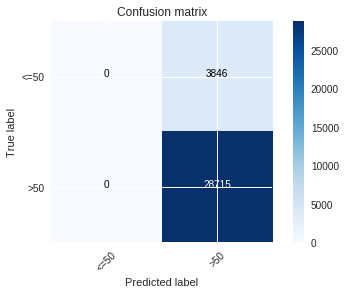

In [45]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1, 0])
np.set_printoptions(precision=2)

print(classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['<=50', '>50'], normalize=False, title='Confusion matrix')


In [48]:
f1_score(y_test, yhat, average='weighted')


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.8265316626392801

In [ ]:
jaccard_similarity_score(y_test, yhat)
